In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report

In [14]:
df = pd.read_csv('/Users/pawan/Downloads/heart_disease.csv')

In [15]:
df.head()

age  gender   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0     1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0     1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0     1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0     1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0     0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  heart_diagnosis  
0    3.0  0.0   6.0                0  
1    2.0  3.0   3.0                2  
2    2.0  2.0   7.0                1  
3    3.0  0.0   3.0                0  
4    1.0  0.0   3.0                0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [17]:
df.describe()

age      gender          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal  heart_diagnosis  
count  301.000000       303.000000  
mean     4.734219         0.937294  
std      1.939706         1.228536  
min      3.000000         0.000000  
25%      3.000000         0.000000  
50%      3.000000         0.000000  
75%      7.000000         2.000000  
max      7.000000         4.000000

In [18]:
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

In [19]:
label_encoder = LabelEncoder()
df['en_thal'] = label_encoder.fit_transform(df['thal'])
df = df.drop('thal', axis=1)

In [20]:
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
heart_diagnosis    0
en_thal            0
dtype: int64

In [21]:
mode_value = df['ca'].mode().iloc[0]

# Impute missing values with the mode
df['ca_imputed'] = df['ca'].fillna(mode_value)
df = df.drop('ca', axis=1)
print(df)

      age  gender   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0    63.0     1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1    67.0     1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2    67.0     1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3    37.0     1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4    41.0     0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
..    ...     ...  ...       ...    ...  ...      ...      ...    ...   
298  45.0     1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0   
299  68.0     1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0   
300  57.0     1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0   
301  57.0     0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0   
302  38.0     1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0   

     oldpeak  slope  heart_diagnosis  en_thal  ca_imputed  
0        2.3    3.0                0        1         0.0  
1  

In [22]:
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
heart_diagnosis    0
en_thal            0
ca_imputed         0
dtype: int64

In [23]:
df.head()

age  gender   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0     1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0     1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0     1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0     1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0     0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope  heart_diagnosis  en_thal  ca_imputed  
0    3.0                0        1         0.0  
1    2.0                2        0         3.0  
2    2.0                1        2         2.0  
3    3.0                0        0         0.0  
4    1.0                0        0         0.0

In [24]:
#As the data is already categorised, we can move to undersampling and oversampling

In [25]:
X = df.drop('gender', axis=1)
y = df['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Original Data (Skewed)
# Initialize the logistic regression model
logreg_model_original = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model_original.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_original = logreg_model_original.predict(X_test_scaled)

# Evaluate the model
accuracy_original = accuracy_score(y_test, y_pred_original)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
class_report_original = classification_report(y_test, y_pred_original)

# Display the results for the original data
print("Results for Original Data:")
print(f"Accuracy: {accuracy_original:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_original)
print("\nClassification Report:")
print(class_report_original)

# Undersampled Data
# Perform random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize the logistic regression model for undersampled data
logreg_model_undersampled = LogisticRegression(random_state=42)

# Fit the model to the resampled training data
logreg_model_undersampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_undersampled = logreg_model_undersampled.predict(X_test_scaled)

# Evaluate the model for undersampled data
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
conf_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)
class_report_undersampled = classification_report(y_test, y_pred_undersampled)

# Display the results for undersampled data
print("\nResults for Undersampled Data:")
print(f"Accuracy: {accuracy_undersampled:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_undersampled)
print("\nClassification Report:")
print(class_report_undersampled)

# Oversampled Data
# Perform random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize the logistic regression model for oversampled data
logreg_model_oversampled = LogisticRegression(random_state=42)

# Fit the model to the resampled training data
logreg_model_oversampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_oversampled = logreg_model_oversampled.predict(X_test_scaled)

# Evaluate the model for oversampled data
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
conf_matrix_oversampled = confusion_matrix(y_test, y_pred_oversampled)
class_report_oversampled = classification_report(y_test, y_pred_oversampled)

# Display the results for oversampled data
print("\nResults for Oversampled Data:")
print(f"Accuracy: {accuracy_oversampled:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_oversampled)
print("\nClassification Report:")
print(class_report_oversampled)


Results for Original Data:
Accuracy: 0.7869

Confusion Matrix:
[[ 9  5]
 [ 8 39]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.64      0.58        14
         1.0       0.89      0.83      0.86        47

    accuracy                           0.79        61
   macro avg       0.71      0.74      0.72        61
weighted avg       0.80      0.79      0.79        61


Results for Undersampled Data:
Accuracy: 0.6393

Confusion Matrix:
[[11  3]
 [19 28]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.79      0.50        14
         1.0       0.90      0.60      0.72        47

    accuracy                           0.64        61
   macro avg       0.63      0.69      0.61        61
weighted avg       0.78      0.64      0.67        61


Results for Oversampled Data:
Accuracy: 0.5902

Confusion Matrix:
[[10  4]
 [21 26]]

Classification Report:
              preci

/Users/pawan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pawan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/pawan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

In [26]:
# Feature Importance for Original Data
feature_importance_original = pd.Series(logreg_model_original.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print("\nFeature Importance for Original Data:")
print(feature_importance_original)

# Feature Importance for Undersampled Data
feature_importance_undersampled = pd.Series(logreg_model_undersampled.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print("\nFeature Importance for Undersampled Data:")
print(feature_importance_undersampled)

# Feature Importance for Oversampled Data
feature_importance_oversampled = pd.Series(logreg_model_oversampled.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print("\nFeature Importance for Oversampled Data:")
print(feature_importance_oversampled)



Feature Importance for Original Data:
en_thal            0.811626
heart_diagnosis    0.512002
cp                 0.484899
chol               0.380469
exang              0.300121
slope              0.273205
trestbps           0.230139
age                0.226805
oldpeak            0.119280
ca_imputed         0.089299
thalach            0.044671
restecg            0.029143
fbs                0.005727
dtype: float64

Feature Importance for Undersampled Data:
en_thal            0.814622
exang              0.438848
fbs                0.293712
cp                 0.284746
heart_diagnosis    0.214756
ca_imputed         0.109775
restecg            0.089617
oldpeak            0.050060
slope              0.012771
thalach            0.011600
trestbps           0.006532
age                0.006455
chol               0.002357
dtype: float64

Feature Importance for Oversampled Data:
en_thal            0.991799
exang              0.662513
heart_diagnosis    0.363875
cp                 0.342698
ca_imp

In [29]:
# Comparing results
comparison_results = pd.DataFrame(index=['Original Data', 'Undersampled Data', 'Oversampled Data'])

# Evaluate the original data model
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original, recall_original, f1_score_original, _ = precision_recall_fscore_support(y_test, y_pred_original, average='binary')
auc_roc_original = roc_auc_score(y_test, logreg_model_original.predict_proba(X_test_scaled)[:, 1])

comparison_results.loc['Original Data', 'Accuracy'] = accuracy_original
comparison_results.loc['Original Data', 'Precision'] = precision_original
comparison_results.loc['Original Data', 'Recall'] = recall_original
comparison_results.loc['Original Data', 'F1 Score'] = f1_score_original
comparison_results.loc['Original Data', 'AUC-ROC'] = auc_roc_original

# Evaluate the undersampled data model
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
precision_undersampled, recall_undersampled, f1_score_undersampled, _ = precision_recall_fscore_support(y_test, y_pred_undersampled, average='binary')
auc_roc_undersampled = roc_auc_score(y_test, logreg_model_undersampled.predict_proba(X_test_scaled)[:, 1])

comparison_results.loc['Undersampled Data', 'Accuracy'] = accuracy_undersampled
comparison_results.loc['Undersampled Data', 'Precision'] = precision_undersampled
comparison_results.loc['Undersampled Data', 'Recall'] = recall_undersampled
comparison_results.loc['Undersampled Data', 'F1 Score'] = f1_score_undersampled
comparison_results.loc['Undersampled Data', 'AUC-ROC'] = auc_roc_undersampled

# Evaluate the oversampled data model
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
precision_oversampled, recall_oversampled, f1_score_oversampled, _ = precision_recall_fscore_support(y_test, y_pred_oversampled, average='binary')
auc_roc_oversampled = roc_auc_score(y_test, logreg_model_oversampled.predict_proba(X_test_scaled)[:, 1])

comparison_results.loc['Oversampled Data', 'Accuracy'] = accuracy_oversampled
comparison_results.loc['Oversampled Data', 'Precision'] = precision_oversampled
comparison_results.loc['Oversampled Data', 'Recall'] = recall_oversampled
comparison_results.loc['Oversampled Data', 'F1 Score'] = f1_score_oversampled
comparison_results.loc['Oversampled Data', 'AUC-ROC'] = auc_roc_oversampled

# Display the comparison results
print("Comparison Results:")
print(comparison_results)


Comparison Results:
                   Accuracy  Precision    Recall  F1 Score   AUC-ROC
Original Data      0.786885   0.886364  0.829787  0.857143  0.854103
Undersampled Data  0.639344   0.903226  0.595745  0.717949  0.703647
Oversampled Data   0.590164   0.866667  0.553191  0.675325  0.700608


/Users/pawan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/pawan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


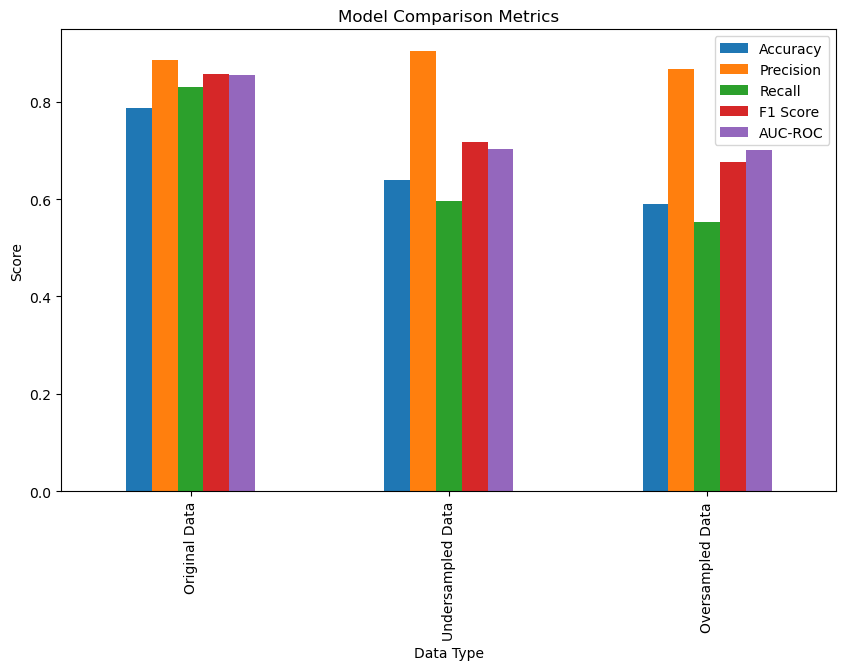

In [33]:
# Results in a Bar plot
results = pd.DataFrame({
    'Accuracy': [accuracy_original, accuracy_undersampled, accuracy_oversampled],
    'Precision': [precision_original, precision_undersampled, precision_oversampled],
    'Recall': [recall_original, recall_undersampled, recall_oversampled],
    'F1 Score': [f1_score_original, f1_score_undersampled, f1_score_oversampled],
    'AUC-ROC': [auc_roc_original, auc_roc_undersampled, auc_roc_oversampled]
}, index=['Original Data', 'Undersampled Data', 'Oversampled Data'])

results.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison Metrics')
plt.ylabel('Score')
plt.xlabel('Data Type')
plt.show()